## Table of Contents

1. [Simulating Returns](#simulating-returns)  
2. [Running the Test](#running-the-test)  
3. [Visualizations](#visualizations)  
    3.1 [Distribution under $H_0$](#distribution-under-$H_0$)  
    3.2 [Distribution under alternative $H_1 : \alpha \sim \mathcal{N}(0, 1)$](distribution-under-alternative-$H_1:\alpha\sim\mathcal{N}(0,1)$)

## Simulating Returns


In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from simulate.simulate_returns import simulate_returns
from tests.CKMS                import CKMS

In [2]:
P             = 1000                #Number of assets
T             = 1000                #Number of observations
L             = 1                   #Number of factors 
sigma_p_sqrt  = np.eye(P)           #Covariance structure of residuals
mu_f          = np.array([[0.07]])  #Mean of factors
sigma_f       = np.array([[0.14]])  #Covariance of factors

R, R_f, Beta, Alpha, _ = simulate_returns(p = P,
                                          t = T,
                                          l = L,
                                          mu_f = mu_f,
                                          sigma_f_sqrt= sigma_f,
                                          sigma_p_sqrt = sigma_p_sqrt)

## Running the Test


In [3]:
tilde_z_grid = np.array([0.1, 1, 10, 100])
test = CKMS(z = tilde_z_grid)
test.test(r = R,
          r_f = R_f,
          adjust_grid = True,
          find_optimal_z = True)
print(test.summary())

+----------------+-----------------------------------------+---------------------+
|   Statistic    |             Values on grid              | Value for optimal z |
+----------------+-----------------------------------------+---------------------+
|       P        |                  1000                   |                     |
|       T        |                  1000                   |                     |
|       L        |                    1                    |                     |
|       c        |                   1.0                   |                     |
|     Best z     |                198.2814                 |      198.2814       |
| Test Statistic | [[17063.26 21219.6  21887.36 21893.14]] |      21893.14       |
|    P-Value     |             [[0. 0. 0. 0.]]             |         0.0         |
+----------------+-----------------------------------------+---------------------+
Initial Grid:[  0.1   1.   10.  100. ]
Adjusted z Grid:[  0.19828145   1.98281445  19.8

## Visualizations

### Distribution under $H_0$

100%|██████████| 1000/1000 [09:21<00:00,  1.78it/s]


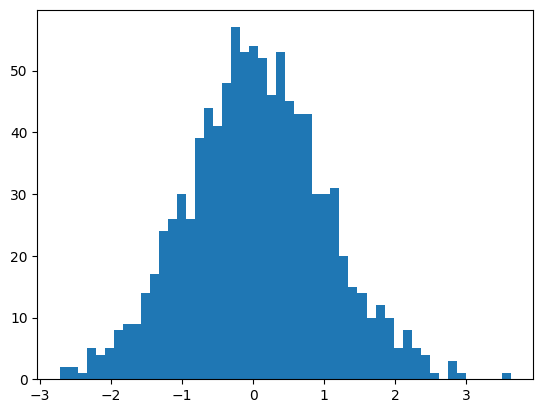

In [9]:
P = 1000
T = 1000
L = 1
N = 1000

sigma_p_sqrt = np.eye(P)
mu_f = np.array([[0.07]])
sigma_f = np.array([[0.14]])

tests = []
for i in tqdm(range(N)):
    R, R_f, Beta, Alpha, _ = simulate_returns(p = P,
                                            t = T,
                                            l = L,
                                            mu_f = mu_f,
                                            sigma_f_sqrt= sigma_f,
                                            sigma_p_sqrt = sigma_p_sqrt)
    
    tester = CKMS(z = [100])
    tester.test(R-Alpha, R_f)
    tests.append(tester.test_results['test_stat'])
    
plt.hist(np.array(tests).flatten(), bins = 50)
plt.show()

### Distribution under alternative $H_1 : \alpha \sim \mathcal{N}(0, 1)$

100%|██████████| 1000/1000 [08:34<00:00,  1.94it/s]


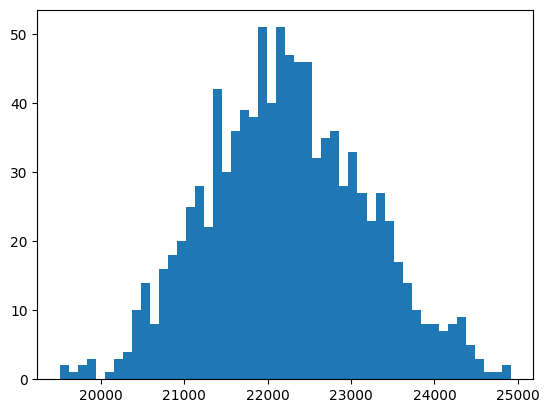

In [10]:
P = 1000
T = 1000
L = 1
N = 1000

sigma_p_sqrt = np.eye(P)
mu_f = np.array([[0.07]])
sigma_f = np.array([[0.14]])

tests = []
for i in tqdm(range(N)):
    R, R_f, Beta, Alpha, _ = simulate_returns(p = P,
                                            t = T,
                                            l = L,
                                            mu_f = mu_f,
                                            sigma_f_sqrt= sigma_f,
                                            sigma_p_sqrt = sigma_p_sqrt)
    
    tester = CKMS(z = [100])
    tester.test(R, R_f)
    tests.append(tester.test_results['test_stat'])
    
plt.hist(np.array(tests).flatten(), bins = 50)
plt.show()